## [教學重點]
學習使用 sklearn 中的 linear regression 模型，並理解各項參數的意義

## [範例重點]
觀察丟進模型訓練的資料格式，輸入 linear regression 與 Logistic regression 的資料有甚麼不同?

## import 需要的套件

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

### Linear regssion

In [3]:
# 讀取糖尿病資料集
diabetes = datasets.load_diabetes()

# 為方便視覺化，我們只使用資料集中的 1 個 feature (column)
X = diabetes.data[:, np.newaxis, 2]
print("Data shape: ", X.shape) # 可以看見有 442 筆資料與我們取出的其中一個 feature

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(X, diabetes.target, test_size=0.1, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

Data shape:  (442, 1)


In [4]:
# 可以看回歸模型的參數值
print('Coefficients: ', regr.coef_)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Coefficients:  [934.05431907]
Mean squared error: 2569.69


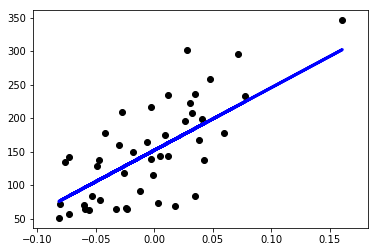

In [4]:
# 畫出回歸模型與實際資料的分佈
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.show()

### Logistics regression

In [8]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, random_state=4)

# 建立模型
logreg = linear_model.LogisticRegression()

# 訓練模型
logreg.fit(x_train, y_train)

# 預測測試集
y_pred = logreg.predict(x_test)

/Users/tsaifeng-ren/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.9333333333333333


## [作業重點]
了解其他資料集的使用方法，如何將資料正確地送進模型訓練

## 練習時間
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

In [23]:
wine = datasets.load_wine()
boston = datasets.load_boston()
breast_cancer = datasets.load_breast_cancer()

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [35]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [90]:
print(wine['feature_names'])

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [38]:
print(wine['data'])

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [91]:
wine_data = pd.DataFrame(wine['data'],columns = wine['feature_names'])

In [96]:
wine_data.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [93]:
np.shape(wine['target_names'])
print(wine['target'])


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [94]:
data_dum = pd.get_dummies(wine['target'])
data_dum = data_dum.rename(columns={0:'class_0',1:'class_1',2:'class_2'})
data_dum

,class_0,class_1,class_2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
173,0,0,1
174,0,0,1
175,0,0,1
176,0,0,1


In [95]:
wine_data1 = pd.concat([wine_data,data_dum],axis=1)
display(wine_data1)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class_0,class_1,class_2
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1,0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1,0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1,0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1,0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,0,0,1
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,0,0,1
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,0,0,1
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,0,0,1


In [124]:
# 切分訓練集/測試集
a = wine_data.alcalinity_of_ash.values
a = a.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(a, data_dum.class_2.values.reshape(-1,1), test_size=0.1, random_state=4)

# 建立模型
logreg = linear_model.LogisticRegression()

# 訓練模型
logreg.fit(x_train, y_train)

# 預測測試集
y_pred = logreg.predict(x_test)

/Users/tsaifeng-ren/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [125]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.7777777777777778


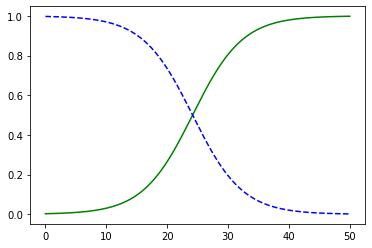

In [130]:
x_new = np.linspace(0,50,1000).reshape(-1,1)
y_proba = logreg.predict_proba(x_new)
plt.plot(x_new,y_proba[:,1],"g-",label="class_0")
plt.plot(x_new,y_proba[:,0],"b--",label="not_class_0")

In [154]:
print(boston['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [183]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [184]:
# 讀取糖尿病資料集
diabetes = datasets.load_diabetes()

# 為方便視覺化，我們只使用資料集中的 1 個 feature (column)
X = boston.data[:, np.newaxis, 2]
print("Data shape: ", X.shape) # 可以看見有 442 筆資料與我們取出的其中一個 feature

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(X, boston.target, test_size=0.1, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

Data shape:  (506, 1)


In [185]:
# 可以看回歸模型的參數值
print('Coefficients: ', regr.coef_)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Coefficients:  [-0.64959885]
Mean squared error: 63.06


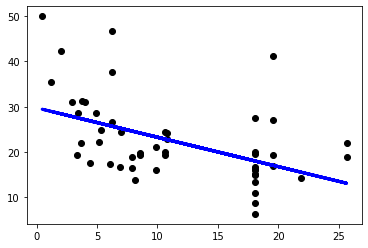

In [186]:
# 畫出回歸模型與實際資料的分佈
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.show()